In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(print_changed_only=False)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("C:\\Users\\hp\\Downloads\\forestfires.csv")

In [3]:
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,2,4,jan,sat,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00
1,4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00
2,2,2,feb,mon,84.0,9.3,34.0,2.1,13.9,40,5.4,0.0,0.00
3,2,2,feb,fri,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.00
4,9,9,feb,thu,84.2,6.8,26.6,7.7,6.7,79,3.1,0.0,0.00
5,9,9,feb,fri,86.6,13.2,43.0,5.3,15.7,43,3.1,0.0,0.00
6,3,4,feb,sat,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00
7,4,6,feb,sat,68.2,21.5,87.2,0.8,15.4,40,2.7,0.0,0.00
8,5,4,feb,sun,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,6.38
9,7,4,feb,sun,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05


In [4]:
df.shape

(517, 13)

In [5]:
df['rain'].value_counts()

0.0    509
0.2      2
0.8      2
1.0      1
6.4      1
0.4      1
1.4      1
Name: rain, dtype: int64

In [6]:
#df = df.drop('rain',axis=1)

In [7]:
df.month = pd.to_datetime(df.month+df.day,format='%b%a')
from time import strftime
df.month = df.month.apply(lambda x:x.strftime('%m'))

In [8]:
df = df[df.area<200]

In [9]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,2,4,01,sat,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.0
1,4,5,01,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.0
2,2,2,02,mon,84.0,9.3,34.0,2.1,13.9,40,5.4,0.0,0.0
3,2,2,02,fri,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.0
4,9,9,02,thu,84.2,6.8,26.6,7.7,6.7,79,3.1,0.0,0.0


C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'Burned Area')

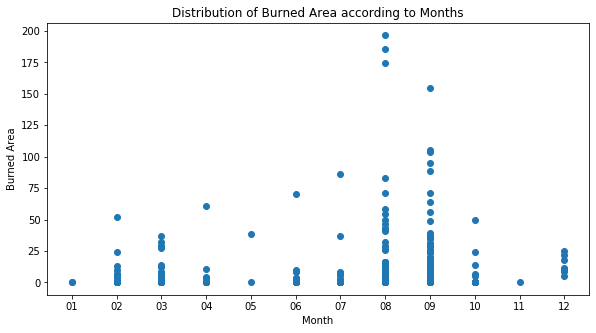

In [10]:
fig = plt.figure(figsize = (15,5))
#Burned Area Vs Month 
plt.subplot2grid((2,3),(0,0),colspan=2,rowspan=2)
plt.plot(df.month,df.area,'o')
plt.title("Distribution of Burned Area according to Months")
plt.xlabel("Month")
plt.ylabel("Burned Area")

Text(0, 0.5, 'Day')

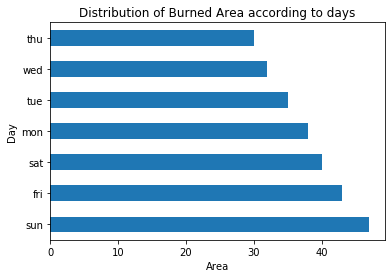

In [11]:
#Day vs Burned Area
df.day[df.area>0].value_counts().plot(kind='barh')
plt.title("Distribution of Burned Area according to days")
plt.xlabel("Area")
plt.ylabel("Day")

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'Y (normailized Location)')

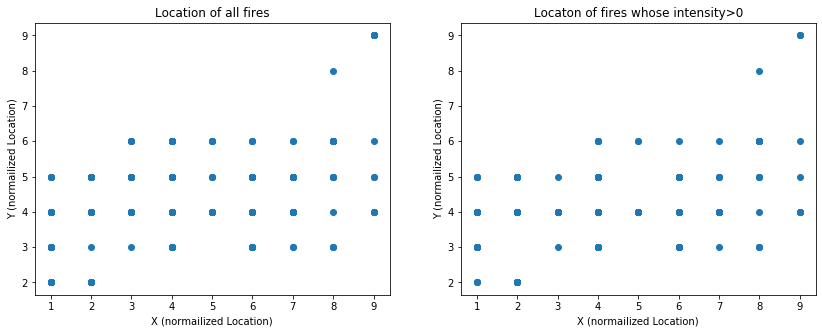

In [12]:
#Subplots based on Locations 
fig = plt.figure(figsize = (14,5))
plt.subplot2grid((1,2),(0,0))
plt.plot(df.X,df.Y,'o')
plt.title("Location of all fires")
plt.xlabel('X (normailized Location)')
plt.ylabel('Y (normailized Location)')
plt.subplot2grid((1,2),(0,1))
plt.plot(df.X[df.area>0],df.Y[df.area>0],'o')
plt.title("Locaton of fires whose intensity>0")
plt.xlabel('X (normailized Location)')
plt.ylabel('Y (normailized Location)')

Text(0.5, 0, 'ISI')

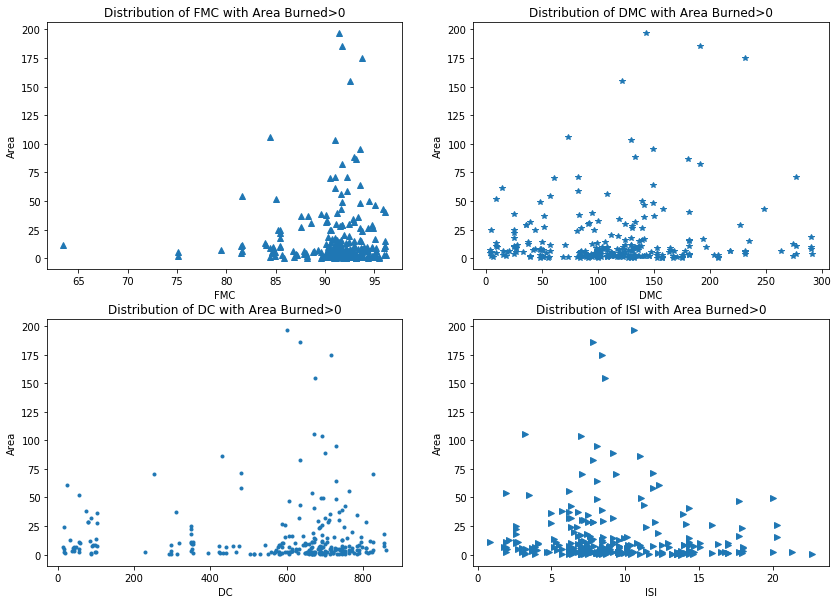

In [13]:
#SUBPLOT 1 For Distribution 
fig = plt.figure(figsize = (14,10))
plt.subplot2grid((2,2),(0,0))
plt.plot(df.FFMC[df.area>0],df.area[df.area>0],'^')
plt.title("Distribution of FMC with Area Burned>0")
plt.ylabel("Area")
plt.xlabel("FMC")

plt.subplot2grid((2,2),(0,1))
plt.plot(df.DMC[df.area>0],df.area[df.area>0],'*')
plt.title("Distribution of DMC with Area Burned>0")
plt.ylabel("Area")
plt.xlabel("DMC")

plt.subplot2grid((2,2),(1,0))
plt.plot(df.DC[df.area>0],df.area[df.area>0],'.')
plt.title("Distribution of DC with Area Burned>0")
plt.ylabel("Area")
plt.xlabel("DC")

plt.subplot2grid((2,2),(1,1))
plt.plot(df.ISI[df.area>0],df.area[df.area>0],'>')
plt.title("Distribution of ISI with Area Burned>0")
plt.ylabel("Area")
plt.xlabel("ISI")

Text(0.5, 0, 'WIND SPEED')

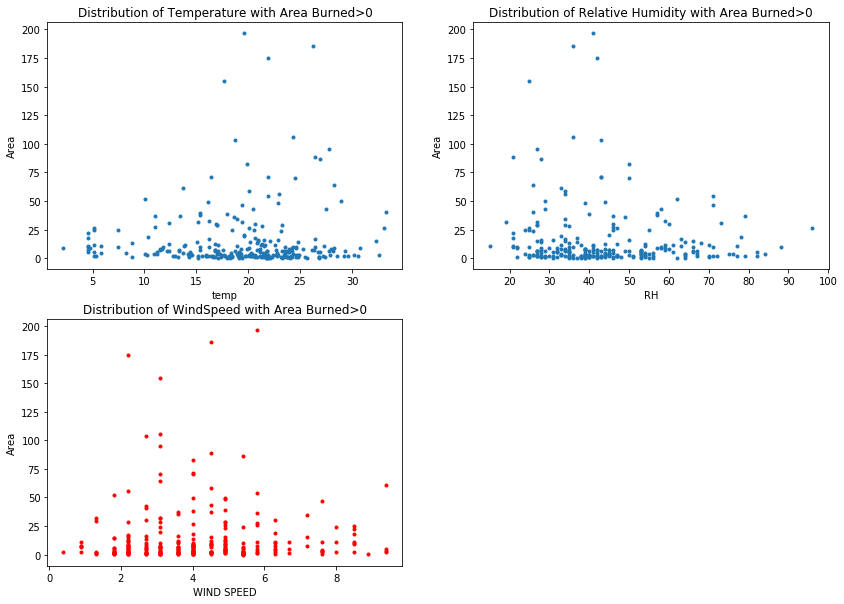

In [14]:
#SUBPLOT2 OF Distribution
fig = plt.figure(figsize = (14,10))
plt.subplot2grid((2,2),(0,0))
plt.plot(df.temp[df.area>0],df.area[df.area>0],'.')
plt.title("Distribution of Temperature with Area Burned>0")
plt.ylabel("Area")
plt.xlabel("temp")

plt.subplot2grid((2,2),(0,1))
plt.plot(df.RH[df.area>0],df.area[df.area>0],'.')
plt.title("Distribution of Relative Humidity with Area Burned>0")
plt.ylabel("Area")
plt.xlabel("RH")

plt.subplot2grid((2,2),(1,0))
plt.plot(df.wind[df.area>0],df.area[df.area>0],'.',color='red')
plt.title("Distribution of WindSpeed with Area Burned>0")
plt.ylabel("Area")
plt.xlabel("WIND SPEED")

In [15]:
df = df.drop('day',axis=1)
df = df.drop('month',axis=1)

In [16]:
df = df[df.area>0]

In [17]:
df.shape

(265, 11)

In [18]:
arr = np.array(df,dtype='float64')
X = arr[:,1:10]
Y = arr[:,10:11]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [20]:
regr_1 = DecisionTreeRegressor()
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=100)
regr_3 = RandomForestRegressor( n_estimators=100)
regr_4 = AdaBoostRegressor(RandomForestRegressor( n_estimators=100))

In [21]:
regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)
regr_3.fit(x_train, y_train)
regr_4.fit(x_train, y_train)
# Predict
ypred_1 = regr_1.predict(x_test)
ypred_2 = regr_2.predict(x_test)
ypred_3 = regr_3.predict(x_test)
ypred_4 = regr_4.predict(x_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
from sklearn.metrics import explained_variance_score

In [23]:
from sklearn.metrics import r2_score

In [24]:
print(explained_variance_score(ypred_1,y_test))
print(explained_variance_score(ypred_2,y_test))
print(explained_variance_score(ypred_3,y_test))
print(explained_variance_score(ypred_4,y_test))

-0.6376863822578172
-2.495206055507594
-2.6811759162873323
-4.1534642813111615


In [25]:
print(r2_score(ypred_1,y_test))
print(r2_score(ypred_2,y_test))
print(r2_score(ypred_3,y_test))
print(r2_score(ypred_4,y_test))

-0.6489941576192924
-2.538093931120882
-2.6934955730215338
-4.273115909435867
